In [1]:
!pip install requests beautifulsoup4
!pip install selenium


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
def scrape_books(base_url, num_pages):
    titles = []
    prices = []

    for page in range(1, num_pages + 1):
        url = f"{base_url}/catalogue/page-{page}.html"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        books = soup.select('.product_pod')

        for book in books:
            title = book.h3.a['title']
            price = book.select_one('.price_color').text.replace('£', '')
            titles.append(title)
            prices.append(float(price))

    return pd.DataFrame({'Title': titles, 'Price (GBP)': prices})


In [5]:
base_url = 'https://books.toscrape.com'
df = scrape_books(base_url, num_pages=5)  # scrape first 5 pages
df.head()


,Title,Price (GBP)
0,A Light in the Attic,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History of Humankind,54.23


Number of books: 100
Average price: £ 34.56
Most expensive book:


,Title,Price (GBP)
68,The Death of Humanity: and the Case for Life,58.11


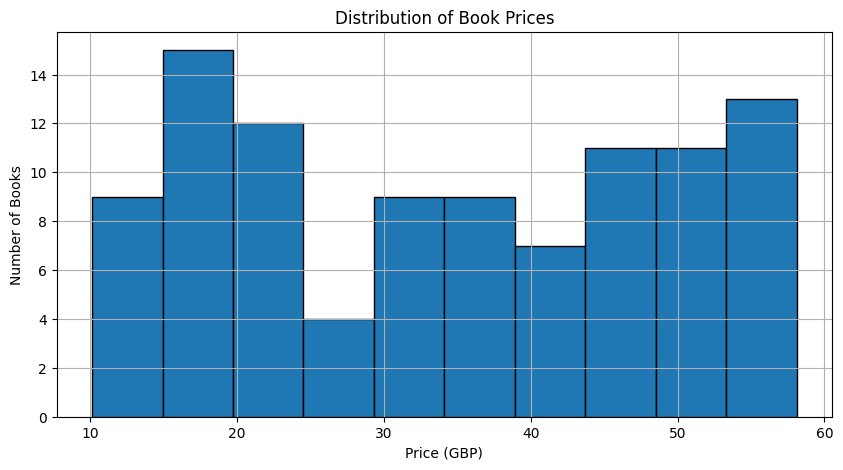

In [6]:
print("Number of books:", len(df))
print("Average price: £", round(df['Price (GBP)'].mean(), 2))
print("Most expensive book:")
display(df[df['Price (GBP)'] == df['Price (GBP)'].max()])

# Plot histogram of prices
plt.figure(figsize=(10,5))
plt.hist(df['Price (GBP)'], bins=10, edgecolor='black')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (GBP)')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()


In [7]:
df.to_csv('scraped_books.csv', index=False)


# **Setting up Headless Chrome**

In [8]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--no-sandbox")

driver = webdriver.Chrome(options=chrome_options)


In [9]:
url = 'https://quotes.toscrape.com/js/'
driver.get(url)

# Wait for JS to load
driver.implicitly_wait(5)

soup = BeautifulSoup(driver.page_source, 'html.parser')
quotes = soup.select('.quote')

data = []
for q in quotes:
    text = q.find('span', class_='text').text
    author = q.find('small', class_='author').text
    data.append({'quote': text, 'author': author})

driver.quit()

df = pd.DataFrame(data)
df.head()


,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
